# I.C.: Aprendizado Supervisionado

Robson Mesquita Gomes  
[<robson.mesquita56@gmail>](mailto:robson.mesquita56@gmail.com)

## Introdução

Diferente dos métodos Transdutivos os métodos de aprendizado supervizionado tratam da Inferência Indutiva/Indução onde os dados são utilizados para gerar uma representação compacta (modelo) e que generalize as informações contidas nos dados.

###### Importações iniciais

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###### Definições de visualização

In [29]:
color = { 
    'red': '#c1586fff', 
    'green': '#4b95a1ff', 
    'gold': '#c4996cff', 
    'black': '#1c1e25ff', 
    'gray': '#5c626eff',
    'dark_gray': '#383d4bff',
    'light_gray':'#999faaff',
}

### Referências da problemática base

Para compreender melhor a sessão a seguir é interessante que se se relembre:

 **Sistema observado:**  
 
 $$Y=G(X)$$
 
 _Onde_
 - _$G$: Processo gerador de dados, que transforma a informação $X$ em $Y$._
 
 **Aproximação:**
 
 $$\theta, \epsilon = F(X,Y)$$
 $$Ỹ = f(X, \theta) + \epsilon$$
 
 _Onde_
 - _$F$: Função de treinamento;_
 - _$\theta$: Parâmetros;_
 - _$\epsilon$: Margem de erro;_
 - _$f$: Função de aproximação._

 **Características de um Modelo I.C.**

 | Notação  |          Característica          |                            Descrição                               |
 |----------|----------------------------------|--------------------------------------------------------------------|
 |     X    | Dados de Entrada _(treinamento)_ | Dados que temos                                                    |
 |     Y    | Dados de Saída _(treinamento)_   | Dados que desejamos prever                                         |
 |     F    | Função de Treinamento            | Aprende $\theta$ a partir dos dados disponíveis                    |
 |     f    | Função de Inferência             | Usa $\theta$ para inferir $y$ a partir dos valores $x$ disponíveis |
 | $\theta$ | Parâmetros                       | Representação do "conhecimento"                                    |
 |$\epsilon$| Incerteza ($ \epsilon = Ỹ - Y $) | Margem de erro padrão das previsões realizadas                     |
 |     Ỹ    | Estimativa                       | Previsão de $Y$ (baseado em $X$) mais a incerteza $\epsilon$       |

### Modelo

Um modelo é um conjunto de parâmetros que serão utilizados pela função de inferência. Esses parâmetros descrevem, ou melhor, generalizam o conjunto de dados possiblitando assim a utilização desses parâmetros no lugar dos próprios dados.

#### Sinal e Ruído

$$Dados = Sinal + Ruído$$

#### Sinal

Trata-se da informação relevante contida nos dados que descreve o comportamento médio e generaliza os dados.

#### Ruído

É definido por pequenas variações no comportamento geral, características específicas de uma instância, que diferem (para mais ou para menos) do comportamento geral. Trata-se da variância em torno do comportamento médio.

#### Objetivos dos modelos de aprendizado supervisionado

Considerando a existência de ruído nos dados obtidos o objetivo dos modelos construídos com base em técnicaas de aprendizado supervisionado se torna filtrar/separar o sinal do ruído nos dados. Isto posto, o melhor sinal fica definido como aquele que generaliza os dados e a melhor generalização é aquela que minimiza o erro. Ao levarmos em conta também o custo computacional um bom modelo é, sem dúvida alguma, àquele que consegue representar o sinal da maneira mais eficiente possível.

### Função de treinamento ($F$)

Nos modelos de aprendizado supervizionado a Função de Treinamento ($F$) é basicamente um método de otimização. O objetivo de $F$ é encontrar o melhor conjunto de parâmetros ($\theta$) que minimize a incerteza ($\epsilon$).

$$\theta, \epsilon = F(f, L, \Omega, \mathcal{D})$$

Onde:

- $\Omega$: Hiperparâmetros
- $\theta$: Modelo/Parâmetros
- $f$: Função de Inferência
- $L$: Função de Custos
- $D$: Dados de treinamento

#### Função de custo ($L$)

Considerando que a incerteza é um dos pontos mais importantes para aferição de precisão, precisamos de uma função que nos restorne tal informação. A essa função chamamos de Função de Custo ($L$).

$$L(y, ỹ) = {\sum_{i=0}^{n}(y_i-ỹ_i)^2 \over n}$$

Onde:
- $ỹ$: saídas estimadas
- $y$: saídas esperadas

#### Algoritmo

**função** $F(f, L, \Omega, \mathcal{D}):$

$\theta \leftarrow$ inicializar_parâmetros($\Omega$)

$\theta \leftarrow \arg \min_{\theta, \epsilon} L(\mathcal{D}, f, \theta)$

**retorna** $\theta, \epsilon$

**fimfunção**

##### Algoritmos de treinamento exatos: Mínimos Quadrados

**Mínimos Quadrados:**

$$a = { {\sum_{i=0}^{n}(x_i - \mathbb{E}[x])(y_i - \mathbb{E}[y])} \over {\sum_{i=0}^{n}}(x_i - \mathbb{E}[x])^2 }$$

$$b = \mathbb{E}[y] - a \cdot \mathbb{E}[x]$$

**Mínimos Quadrados Ordinários**

$$W = (X^T X)^{-1} X^T Y$$

### Função de inferência (f)

#### Regressão linear

Uma das funções de inferência mais "simples" é a de regressão linear.

$$ f: \mathbb{R} \rightarrow \mathbb{R} $$
$$ ỹ = a \cdot x + b $$

##### Demonstração

In [6]:
x = np.array([value for value in np.arange(-2.0, 2.0, 0.1)])

n = len(x)

$$y_i = {-1.9 \cdot x_i - \pi + \mathcal{N}(\mu = 0, \sigma = 0.5)}$$

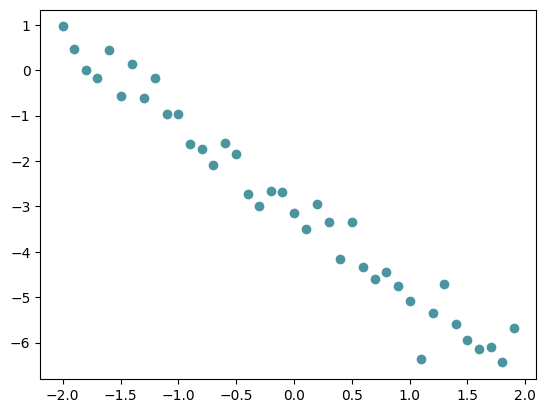

In [24]:
y = np.array([-1.9*xi - np.pi + np.random.normal(0, 0.5, 1) for xi in x]).flatten()

plt.scatter(x,y, c=color['green'])

### Função de Treinamento: Mínimos Quadrados

Para a função de inferência $ỹ = f(x)$, tal que $f(x) = ax +b$, para encontrar o conjunto de parâmetros $\theta = \{a,b\}$ usam-se as fórmulas abaixo.

$$a = { {\sum_{i=0}^{n}(x - \bar{x})(y - \bar{y})} \over {\sum_{i=0}^{n}}(x_i - \bar{x})^2 }$$

$$b = \bar{y} - a\cdot \bar{x}$$

Onde $\bar{x}$ e $\bar{y}$ são os valores médios de $x$ e $y$ respectivamente.

In [9]:
x = np.array([value for value in np.arange(-2.0, 2.0, 0.1)])

n = len(x)

$$y_i = {-1.9 \cdot x_i - \pi + \mathcal{N}(\mu = 0, \sigma = 0.5)}$$

In [10]:
y = np.array([-1.9*xi - np.pi + np.random.normal(0, 0.5, 1) for xi in x]).flatten()

In [11]:
a,b = 0,0
xm = np.average(x)
ym = np.average(y)

num = np.sum([ (x[i] - xm)*(y[i] -ym) for i in range(n) ])
den = np.sum([ (x[i] - xm)**2 for i in range(n) ])

a = num/den
b = ym - a * xm

[a, b]

[-1.8787210217718011, -3.0385531630783342]

#### Estimativa

$$y_i = a \cdot x_i + b$$

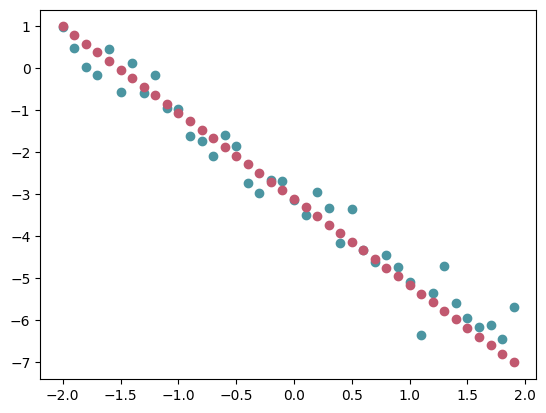

In [25]:
yt = [ a*x[i] + b for i in range(n) ]

plt.scatter(x,y, c=color['green'])
plt.scatter(x,yt, c=color['red'])

### Função de Treinamento por Indução Iterativas

**função** $F(f, L, \Omega, \mathcal{D})$:

$\theta \leftarrow$ inicializar_parâmetros($\Omega$)

**enquanto** ( ($\epsilon \leftarrow L$($\mathcal{D}$, $f$, $\theta$)) > critério_de_parada($\Omega$) ):  

$\theta \leftarrow $ atualizar_parâmetros($\theta$, $\epsilon$, $\Omega$)

**fimenquanto**

**retorna** $\theta$

**fimfunção**

#### Gradiente Descendente (GD)

$\theta \leftarrow$ Valores Aleatórios

$\alpha \leftarrow$ 0.005

$\forall x,y \in \mathcal{D}:$

$$ỹ \leftarrow f(x, \theta)$$

$$\epsilon \leftarrow L(y, ỹ)$$

$$\theta \leftarrow { { \theta - \alpha } \cdot { {\delta \epsilon} \over { \delta \theta } } }$$

Onde:

- $\alpha$: Taxa de aprendizado
- $ỹ \leftarrow f(x, \theta)$: Método de inferência
- $\epsilon \leftarrow L(y, ỹ)$: Cálculo do erro
- $\theta \leftarrow { { \theta - \alpha } \cdot { {\delta \epsilon} \over { \delta \theta } } }$: Atualização dos parâmetros com base na derivada de $L$

##### Porque utilizar derivadas (${\delta \epsilon}\over{\delta \theta}$) em GD

> "A função é uma bacia e queremos chegar ao fundo dela!"
>
> Prof. Dr. Petrônio Silva

A derivada define uma taxa de mudança, o gradiente observa para onde a função está crescendo ou diminuindo, nesse caso, quando a derivada é diferente de zero a função está "se movimentando", caso contrário ela está "parada". Observa-se então que quanto maior a derivada, mais a função está longe do mínimo e quanto menor a derivada, mais a função está perto do mínimo.

Com isso em mente temos as seguintes missões para cada uma das partes do algoritmo.

- $ỹ \leftarrow f(x, \theta)$:  
  Estima uma saída com base nos valores de entrada e nos parâmetros.
- $\epsilon \leftarrow L(y, ỹ)$:  
  Calcula o erro da estimativa gerada por $f$ tomando como base os valores corretos.
- ${\delta \epsilon} \over { \delta \theta }$:  
  Calcula o quanto cada parâmetro do modelo contribui para o erro total
- $\theta \leftarrow { { \theta - \alpha } \cdot { {\delta \epsilon} \over { \delta \theta } } }$:  
  Corrige o parâmetro com base na sua contribuição com o erro total
  
  
###### Pequena tabela de derivadas

Nota: $y' = {{\delta y}\over{\delta x}}$

| Função                  | Derivada                                                                                      |
|-------------------------|-----------------------------------------------------------------------------------------------|
| $y {= a}$               | ${{\delta y}\over{\delta x}} = 0$                                                             |
| $y {= ax}$              | ${{\delta y}\over{\delta x}} = a$                                                             |
| $y {= x^n}$             | ${{\delta y}\over{\delta x}} {= {nx^{n-1}}}$                                                  |
| $y {= {{f(x)}{+g(x)}}}$ | ${{\delta y}\over{\delta x}} {= {{{\delta f}\over{\delta x}} + {{\delta g}\over{\delta x}}}}$ |
| $y {= {f(g(x))}}$       | ${{\delta y}\over{\delta x}} {= {f'({g(x)})}{+g'(x)}}$                                        |

###### Derivadas do erro quadrático

Para a **função de inferência $f$** temos

$$ỹ = {f(x,a,b)} = {ax+b}$$

Nesse caso, as derivadas parciais de $f$ são

$${{\delta ỹ} \over {\delta a}} = x$$  

$${{\delta ỹ} \over {\delta b}} = 1$$

Já para a **função $L$ que calcula o erro $\epsilon$** temos

$${\epsilon} = {L(x,y,a,b)} = {(y-ỹ)^2} = {(y-f(x,a,b))^2} = {(y-ax-b)^2}$$

Para esse caso as derivadas parciais de $\epsilon$ são

$${{\delta \epsilon} \over {\delta f}} = 2\epsilon$$

$${{\delta \epsilon} \over {\delta a}} = 
{{\delta \epsilon} \over {\delta f}} \cdot {{\delta \epsilon} \over {\delta a}} = 
2 \cdot \epsilon \cdot (-x)$$

$${{\delta \epsilon} \over {\delta b}} = 
{{\delta \epsilon} \over {\delta f}} \cdot {{\delta \epsilon} \over {\delta b}} = 
2 \cdot \epsilon \cdot (-1)$$

###### Derivadas do erro quadrático médio

Para a **função de inferência $f$** temos

$$ỹ = {f(x,a,b)} = {ax+b}$$

Nesse caso, as derivadas parciais de $f$ são

$${{\delta ỹ} \over {\delta a}} = x$$  

$${{\delta ỹ} \over {\delta b}} = 1$$

Já para a **função $L$ que calcula o erro $\epsilon$** temos

$${\epsilon} = {L(x,y,a,b)} = {(y_i-ỹ_i)^2} = \sum_{i=0}^{n}{(y_i-f(x_i,a,b))^2} = \sum_{i=0}^{n}{(y_i-ax_i-b)^2}$$

Para esse caso as derivadas parciais de $\epsilon$ são

$${{\delta \epsilon} \over {\delta f}} = 2\epsilon$$

$${{\delta \epsilon} \over {\delta a}} = 
{{\delta \epsilon} \over {\delta f}} \cdot {{\delta \epsilon} \over {\delta a}} = 
2 \cdot \epsilon \cdot (-x)$$

$${{\delta \epsilon} \over {\delta b}} = 
{{\delta \epsilon} \over {\delta f}} \cdot {{\delta \epsilon} \over {\delta b}} = 
2 \cdot \epsilon \cdot (-1)$$

#### Treinamento Iterativo: Gradiente Descendente

$a \leftarrow $ valor aleatório

$b \leftarrow $ valor aleatório

$\alpha \leftarrow 0.005$

$\forall x,y \in \mathcal{D}:$

$$ỹ \leftarrow ax+b$$
$$\epsilon \leftarrow (y - ỹ)$$
$$a \leftarrow a - \alpha(-2 \cdot \epsilon \cdot x)$$
$$b \leftarrow b - \alpha(-2 \cdot \epsilon)$$

In [16]:
x = np.array([value for value in np.arange(-2.0, 2.0, 0.1)])

n = len(x)

$$y_i = {-1.9 \cdot x_i - \pi + \mathcal{N}(\mu = 0, \sigma = 0.5)}$$

In [17]:
y = np.array([-1.9*xi - np.pi + np.random.normal(0, 0.5, 1) for xi in x]).flatten()

[-1.8505572177991165, -3.0227460194583142]

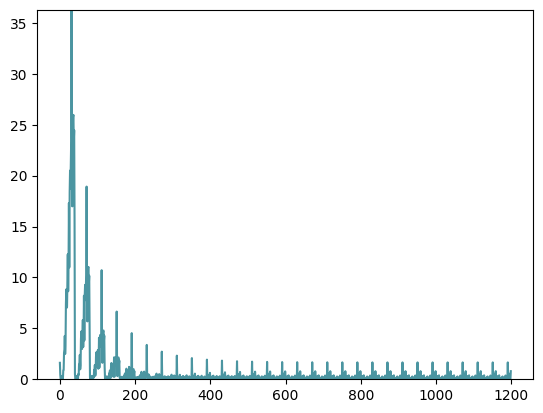

In [26]:
# Inicializando parâmetros

a = np.random.normal(0, 0.5)
b = np.random.normal(0, 0.5)

# Hiperparâmetros

alpha = 0.005 # Taxa de aprendizado
iteracoes = 30

historico = [] # Curva de aprendizado

# Algoritmo do Gradiente Descendente

for g in range(iteracoes):
    for i in range(n):
        estimativa = a * x[i] + b # função de inferência (f)
        erro = y[i] - estimativa # função de custo (L)
        
        # Salva o erro quadrático atual
        historico.append(erro**2)
        
        # Atualização dos parâmetros
        a = a - alpha * ( -2 * erro * x[i])
        b = b - alpha * ( -2 * erro)
        
plt.plot(historico, c=color['green'])
plt.ylim((0,max(historico)))

[a,b]

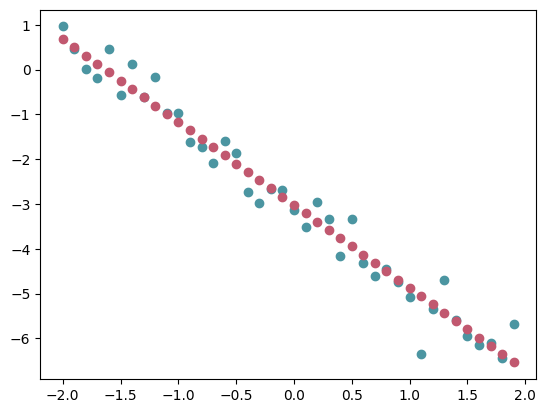

In [27]:
yt = [ a*x[i] + b for i in range(n) ]

plt.scatter(x,y, c=color['green'])
plt.scatter(x,yt, c=color['red'])

## Resumo

### Treinamento Supervisionado: Regressão linear

|                |                          |                                                  |
|----------------|--------------------------|--------------------------------------------------|
| $\theta$       | Vetor de coeficientes    | $a,b \in \mathbb{R}$                             |
| $f$            | Equação do primeiro grau | $ỹ = ax + b$                                     |
| $F$            | Mínimos Quadrados        | Fechada                                          |
| $F$            | Gradiente Descendente    | Iterativo                                        |
| $L$            | Erro Quadrático médio    | ${\epsilon} {= {\sum_{i=0}^{n}{(y_i{-ỹ_i})^2}}}$ |

#### Função de treinamento ($F$)

Nos modelos de aprendizado supervizionado a Função de Treinamento ($F$) é basicamente um método de otimização. O objetivo de $F$ é encontrar o melhor conjunto de parâmetros ($\theta$) que minimize a incerteza ($\epsilon$).

$$\theta, \epsilon = F(f, L, \Omega, \mathcal{D})$$

Onde:

- $\Omega$: Hiperparâmetros
- $\theta$: Modelo/Parâmetros
- $f$: Função de Inferência
- $L$: Função de Custos
- $D$: Dados de treinamento

#### Função de custo ($L$)

Considerando que a incerteza é um dos pontos mais importantes para aferição de precisão, precisamos de uma função que nos restorne tal informação. A essa função chamamos de Função de Custo ($L$).

$$L(y, ỹ) = {\sum_{i=0}^{n}(y_i-ỹ_i)^2 \over n}$$

Onde:
- $ỹ$: saídas estimadas
- $y$: saídas esperadas

![](aprendizado-supervisionado.png)

[<< Tópico Anterior](02-natureza-dos-processos.ipynb)